<a href="https://colab.research.google.com/github/VibroGuard/Anomaly-Detection/blob/main/AutoEncoder-Method%20/Model-1/Model_X_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model

[[-0.14]
 [-0.03]
 [ 0.01]
 ...
 [ 0.29]
 [ 0.29]
 [ 0.31]]


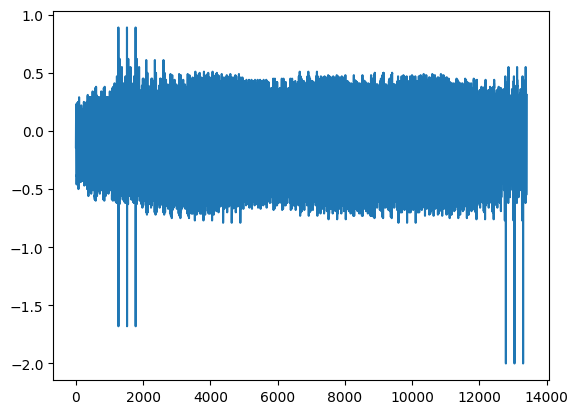

In [64]:
a = 4000  # 4000
b = 20000  # :

with open("x_data.txt", "rt") as x_data_file:
  line = x_data_file.readline()
  x_data = np.array(list(map(float, line.split()))).reshape(-1, 1)[a : b]
  print(x_data)

  plt.plot(x_data)

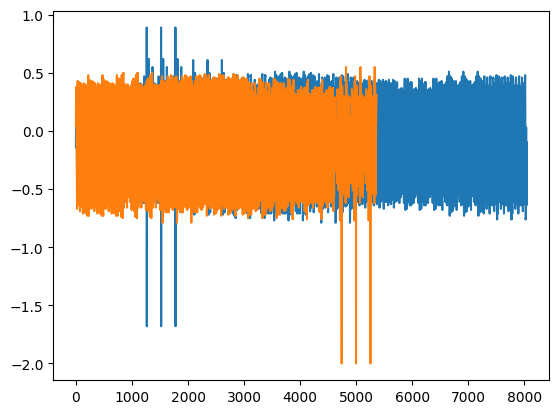

In [65]:
# Divide into train and test datasets.
train_ratio = 0.6

Xtrain = x_data[:int(train_ratio * x_data.size)]
Xtest = x_data[int(train_ratio * x_data.size):]

plt.plot(Xtrain)
plt.plot(Xtest)

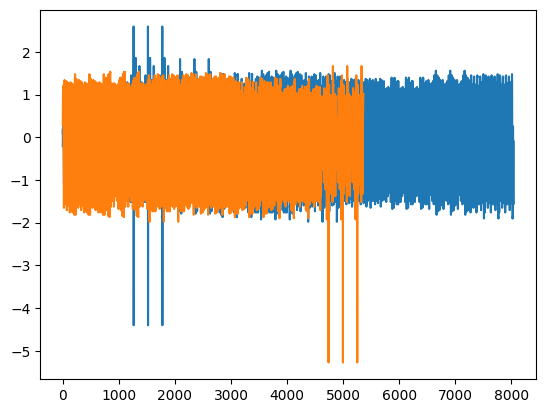

In [66]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized.
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

plt.plot(Xtrain)
plt.plot(Xtest)

In [67]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
#In this example, the n_features is 2. We will make timesteps = 3.
#With this, the resultant n_samples is 5 (as the input data has 9 rows).

seq_size = 30  # Number of time steps to look back
#Larger sequences (look further back) may improve forecasting.


def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(x.size - seq_size):
        #print(i)
        x_values.append(x[i:(i+seq_size)])
        y_values.append(y[i+seq_size])

    return np.array(x_values), np.array(y_values)

In [68]:
trainX, trainY = to_sequences(Xtrain, Xtrain, seq_size)
testX, testY = to_sequences(Xtest, Xtest, seq_size)

In [69]:
print(Xtrain.shape)
print(Xtest.shape)

print(trainX.shape)
print(trainY.shape)

# print(trainX[:2])

# plt.plot(trainX)
# plt.plot(trainY)

(8044, 1)
(5364, 1)
(8014, 30, 1)
(8014, 1)


In [70]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(rate=0.2))

# model.add(RepeatVector(trainX.shape[1]))

# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(rate=0.2))
# model.add(TimeDistributed(Dense(trainX.shape[2])))
# model.compile(optimizer='adam', loss='mae')
# model.summary()

In [71]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(trainX.shape[2])))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 128)           66560     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector_3 (RepeatVec  (None, 30, 64)            0         
 tor)                                                            
                                                                 
 lstm_10 (LSTM)              (None, 30, 64)            33024     
                                                                 
 lstm_11 (LSTM)              (None, 30, 128)           98816     
                                                                 
 time_distributed_3 (TimeDi  (None, 30, 1)             129       
 stributed)                                           

In [72]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
226/226 [==============================] - 34s 121ms/step - loss: 0.2681 - val_loss: 0.1086
Epoch 2/10
226/226 [==============================] - 28s 123ms/step - loss: 0.1210 - val_loss: 0.0370
Epoch 3/10
226/226 [==============================] - 27s 122ms/step - loss: 0.1082 - val_loss: 0.0372
Epoch 4/10
226/226 [==============================] - 30s 131ms/step - loss: 0.0973 - val_loss: 0.0385
Epoch 5/10
226/226 [==============================] - 28s 126ms/step - loss: 0.0962 - val_loss: 0.0424
Epoch 6/10
226/226 [==============================] - 29s 128ms/step - loss: 0.0923 - val_loss: 0.0424
Epoch 7/10
226/226 [==============================] - 28s 123ms/step - loss: 0.0881 - val_loss: 0.0426
Epoch 8/10
226/226 [==============================] - 27s 119ms/step - loss: 0.0871 - val_loss: 0.0352
Epoch 9/10
226/226 [==============================] - 27s 120ms/step - loss: 0.0877 - val_loss: 0.0513
Epoch 10/10
226/226 [==============================] - 27s 120ms/step - l

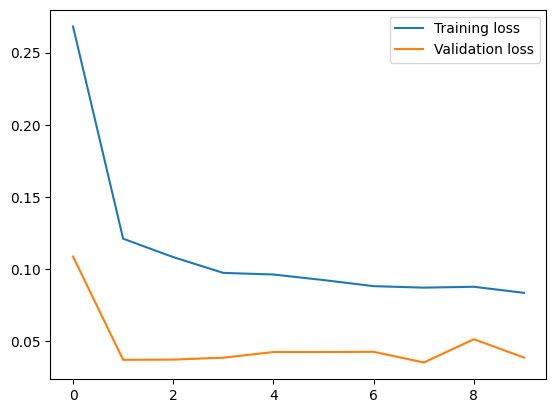

In [73]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

251/251 [==============================] - 12s 46ms/step


(array([  7.,   9.,  22.,  82., 125., 193., 245., 431., 678., 919., 850.,
        848., 900., 603., 510., 372., 396., 302., 225., 138.,  41.,  40.,
         17.,  20.,  11.,   9.,   7.,   5.,   3.,   6.]),
 array([0.29203534, 0.35678525, 0.42153517, 0.48628508, 0.55103499,
        0.6157849 , 0.68053481, 0.74528472, 0.81003463, 0.87478454,
        0.93953445, 1.00428436, 1.06903428, 1.13378419, 1.1985341 ,
        1.26328401, 1.32803392, 1.39278383, 1.45753374, 1.52228365,
        1.58703356, 1.65178348, 1.71653339, 1.7812833 , 1.84603321,
        1.91078312, 1.97553303, 2.04028294, 2.10503285, 2.16978276,
        2.23453267]),
 <BarContainer object of 30 artists>)

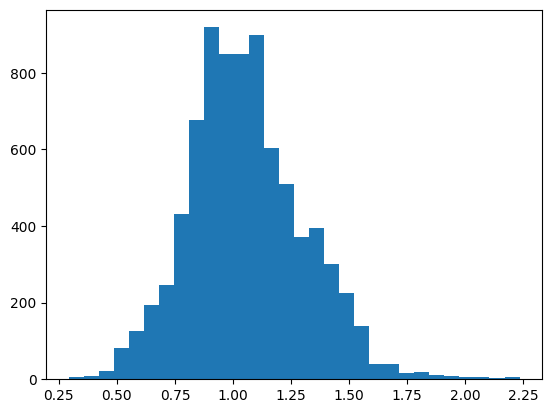

In [74]:
#Anomaly is where reconstruction error is large.
#We can define this value beyond which we call anomaly.
#Let us look at MAE in training prediction

trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)

167/167 [==============================] - 8s 47ms/step


(array([ 27.,  28.,  24.,  28.,  41., 129., 206., 457., 692., 732., 698.,
        628., 339., 301., 274., 274., 212., 115.,  33.,  20.,  15.,   8.,
         11.,  14.,   7.,   6.,   2.,   4.,   6.,   3.]),
 array([0.36683996, 0.43471117, 0.50258238, 0.5704536 , 0.63832481,
        0.70619602, 0.77406724, 0.84193845, 0.90980967, 0.97768088,
        1.04555209, 1.11342331, 1.18129452, 1.24916574, 1.31703695,
        1.38490816, 1.45277938, 1.52065059, 1.58852181, 1.65639302,
        1.72426423, 1.79213545, 1.86000666, 1.92787788, 1.99574909,
        2.0636203 , 2.13149152, 2.19936273, 2.26723395, 2.33510516,
        2.40297637]),
 <BarContainer object of 30 artists>)

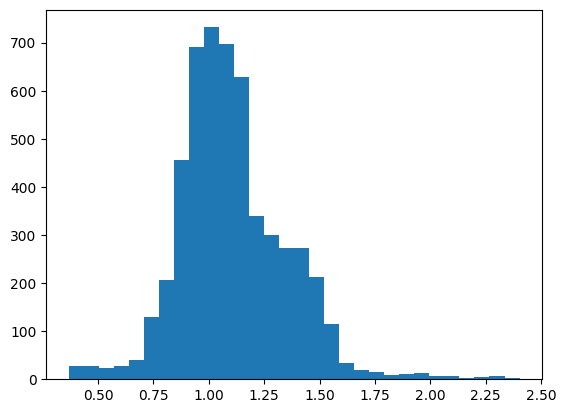

In [75]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)

In [76]:
# max_trainMAE = 1.8 #or Define 90% value of max as threshold.
max_trainMAE = np.max(trainMAE) * 0.9
print(max_trainMAE)

2.0110794068558926


In [77]:
print(trainMAE.shape)
print(testMAE.shape)

(8014, 1)
(5334, 1)


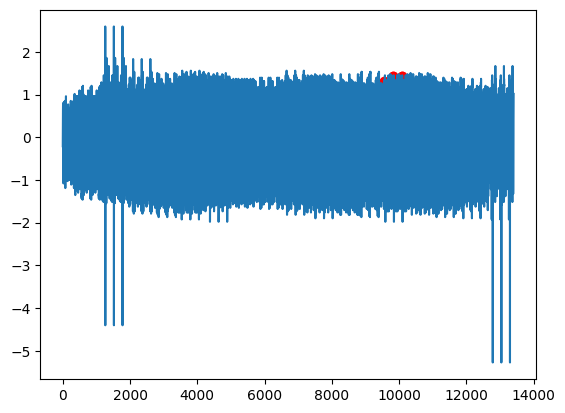

In [78]:
train_anomaly_indices = np.asarray(trainMAE > max_trainMAE).nonzero()[0]
test_anomaly_indices = np.asarray(testMAE > max_trainMAE).nonzero()[0]

anomaly_indices = np.concatenate((train_anomaly_indices.reshape(-1, 1), test_anomaly_indices.reshape(-1, 1) + int(train_ratio * x_data.size)))
anomaly_values = np.concatenate((Xtrain[train_anomaly_indices], Xtest[test_anomaly_indices]))

plt.plot(np.concatenate((Xtrain, Xtest)))
plt.scatter(anomaly_indices, anomaly_values, c="r")

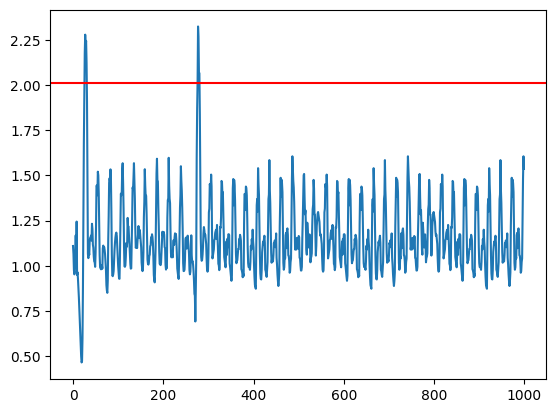

In [82]:
a = 2000
b = 3000

plt.plot(testMAE[a: b])
plt.axhline(y=max_trainMAE, color='r', linestyle='-')